## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

In [1]:
from basic import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify = ym, random_state = 42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state = 0)

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 배깅 (Bootstrap aggregating)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, verb

oob_score를 True로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가합니다.

In [3]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.962
테스트 세트 정확도 : 0.958
OOB 샘플의 정확도 : 0.948


In [4]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, random_state = 42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

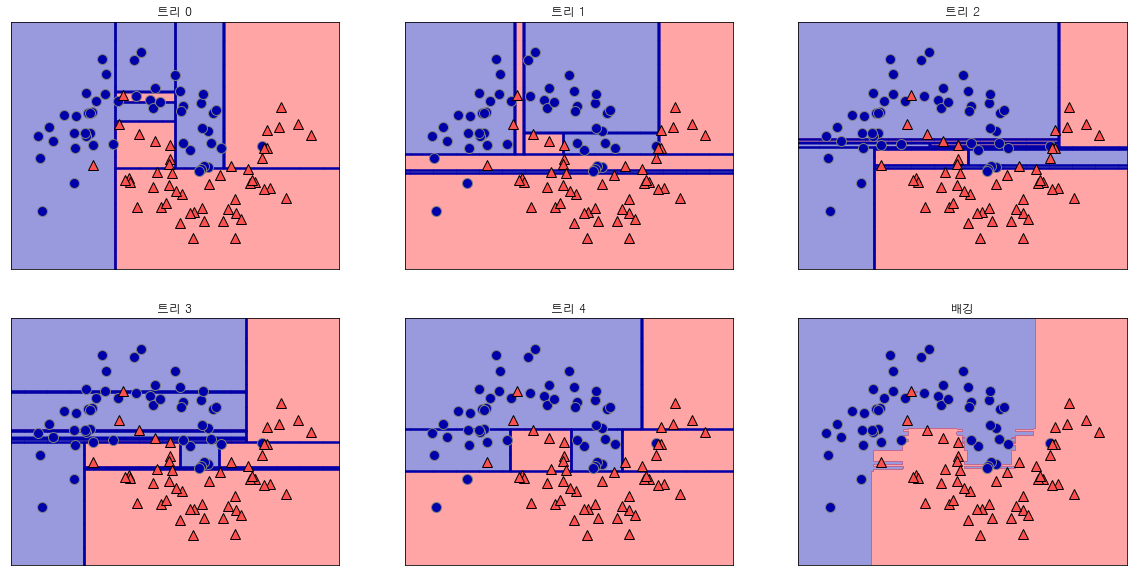

In [5]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [6]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100,oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [7]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
OOB 샘플의 정확도 : 0.951


### 엑스트라 트리

랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾습니다.  
DecisionTreeClassifier(splitter = 'random')을 사용하고 부트스트랩 샘플링은 적용하지 않습니다.

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(n_estimators = 5, n_jobs = -1, random_state = 0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

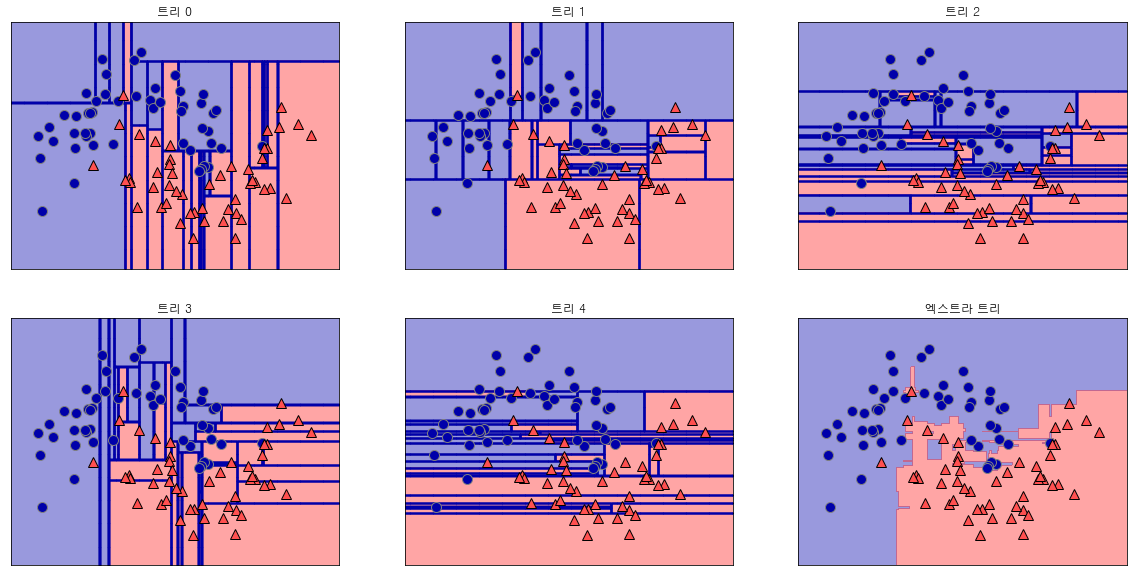

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [10]:
xtree = ExtraTreesClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [11]:
print("훈련 세트 정확도 : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만 무작위 분할 때문에  
일반화 성능을 높이려면 종종 많은 트리를 만들어야 하기 이유로 랜덤 포레스트가 더 선호됩니다.

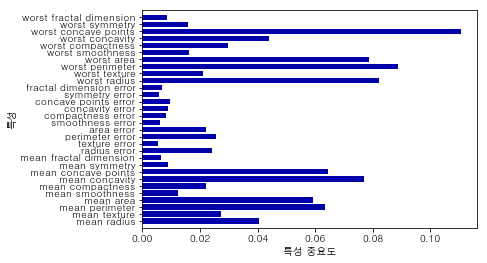

In [12]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show();

### 에이다부스트 (Adaptive Boosting)

그래디언트 부스팅처럼 약한 학습기 를 사용합니다.  
이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킵니다.  
훈련된 각 모델은 성능에 따라 가중치가 부여됩니다.  
예특을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 갓을 가진 레이블을 선택합니다.

scikit-learn의 AdaBoostClassifier는 기본값으로 DecisionTreeClassifier(max_depth = 1)를 사용하고  
AdaBoostRegressor는 DecisionTreeRegressor(max_depth = 3)를 사용합니다.  
base_estimator 매개변수에서 다른 모델을 지정할 수도 있습니다.  
순차적으로 학습해야 하기 때문에 n_jobs 매개변수를 지원하지 않습니다.

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 5, random_state = 42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

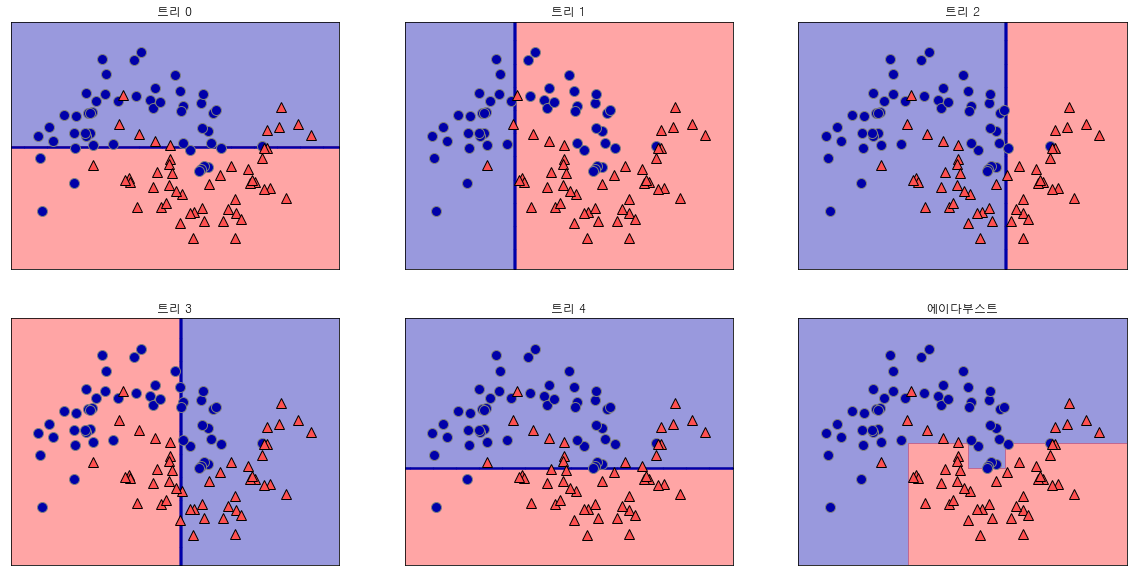

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [15]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [16]:
print("훈련 세트 정확도 : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


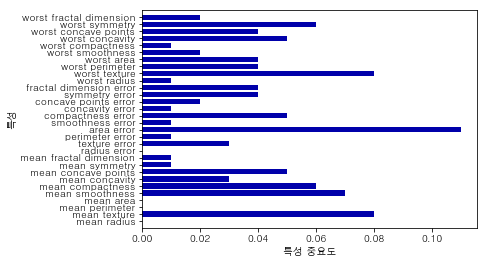

In [17]:
plt.barh(range(n_features), ada.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show();